## Set of Barplots created using seaborn

Examples on how to create a barplot using seaborn

## 1.Load required libraries

- Basic libraries for files manipulation **os**  and data wrangling **pandas** 

In [1]:
# 1. Load basic libraries
import pandas as pd
import os

- Specific libraries for Seaborn charts

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [3]:
# 2.Import Excel file into Python 

my_wd = os.getcwd()
print("My working directory is:",my_wd)

# 2.1 List files in \data folder to identify Excel file to be imported into Python 
new_wd_ML_using_python = os.path.join("/home","pablo","Documents","Pablo_zorin","VS_Python_GitHub_Pablo_source","ML-using-Python")


My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


In [4]:
# And we change existing working directory to ML-using-Python folder to access the \data folder
os.chdir(new_wd_ML_using_python)

new_wd = os.getcwd()
print("Changed working directory to:",new_wd)

Changed working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


In [5]:

data_folder = os.path.join("/home","pablo","Documents","Pablo_zorin","VS_Python_GitHub_Pablo_source","ML-using-Python",
                           'data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)

# 2.2 Build  path to Excel file location
ine_population_nationality = os.path.join('data','INE total and foreign population figures Spain.xlsx')
print('ÍNE_population_nationality:',ine_population_nationality)

data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', 'AE_Attendances_2010_2024.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx']
ÍNE_population_nationality: data/INE total and foreign population figures Spain.xlsx


## 2. Import Excel file into Python 

In [6]:
ine_population_nationality = os.path.join('data','INE total and foreign population figures Spain.xlsx')
print('ÍNE_population_nationality:',ine_population_nationality)

ÍNE_population_nationality: data/INE total and foreign population figures Spain.xlsx


- Get tab names from imported Excel file to load third tab from incoming Excel file

In [7]:
import openpyxl

In [8]:
xl = pd.ExcelFile(ine_population_nationality)

xl.sheet_names  # see all sheet names

#xl.parse(sheet_name)  # read a specific sheet to DataFrame

['INE_Foreign_population',
 'INE_Total_population',
 'INE_Total_foreign_population']

In [9]:
INEdata = pd.read_excel(ine_population_nationality,
                                  sheet_name = 'INE_Total_foreign_population',
                                  skiprows= 2
                                )
INEdata.head()



,Todas las edades,Total,Foreign population,% Foreign Nationals/Total population,Total YoY(N),Total YoY)(%),Foreign Nationals YoY(N),Foreign Total YoY)(%)
0,1 de enero de 2025,49077984,6852348.0,0.139622,NaN,NaN,NaN,NaN
1,1 de enero de 2024,48619695,6502282.0,0.133738,458289.0,0.009426,350066.0,0.053837
2,1 de enero de 2023,48085361,6089620.0,0.126642,534334.0,0.011112,412662.0,0.067765
3,1 de enero de 2022,47486727,5509046.0,0.116012,598634.0,0.012606,580574.0,0.105386
4,1 de enero de 2021,47400798,5402702.0,0.113979,85929.0,0.001813,106344.0,0.019683


In [10]:
INEdata.columns

Index(['Todas las edades', 'Total', 'Foreign population',
       '% Foreign Nationals/Total population', 'Total YoY(N)', 'Total YoY)(%)',
       'Foreign Nationals YoY(N)', 'Foreign Total YoY)(%)'],
      dtype='object')

- Rename columnns from imported data

In [11]:
# Rename columns
INEdata.columns = ['Date','Total_population','Foreign_population','Percent_foreign_population',
'Total population YoY(N)','Total population  YoY(%)','Foreign population YoY(N)','Foreign population  YoY(%)']

- Start by subsetting previous data set keeping initial variables (Date,Total_population,Foreign_population), used to derive the rest of columns in INE_data dataframe

In [12]:
INE_total_foreign_population = INEdata[['Date','Total_population','Foreign_population']]
INE_total_foreign_population.head()

,Date,Total_population,Foreign_population
0,1 de enero de 2025,49077984,6852348.0
1,1 de enero de 2024,48619695,6502282.0
2,1 de enero de 2023,48085361,6089620.0
3,1 de enero de 2022,47486727,5509046.0
4,1 de enero de 2021,47400798,5402702.0


- Get Datafranme columns data types info, we want to extract year from Date column

In [13]:
INE_total_foreign_population.head()

,Date,Total_population,Foreign_population
0,1 de enero de 2025,49077984,6852348.0
1,1 de enero de 2024,48619695,6502282.0
2,1 de enero de 2023,48085361,6089620.0
3,1 de enero de 2022,47486727,5509046.0
4,1 de enero de 2021,47400798,5402702.0


In [14]:
INE_total_foreign_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                25 non-null     object 
 1   Total_population    26 non-null     object 
 2   Foreign_population  21 non-null     float64
dtypes: float64(1), object(2)
memory usage: 876.0+ bytes


## 3. Extract year from character Date column Pandas DataFrame  

Using String slicing we will start creating new date variables from initial Srting Date column

In [15]:
n = 4
last_chars = INE_total_foreign_population['Date'][-n:]
print(last_chars)

27    Foreign population (non spanish nationals)
28                                           NaN
29                                        Source
30                                           NaN
Name: Date, dtype: object


In [16]:
n = 4

In [17]:
INE_total_foreign_population['Year'] = INE_total_foreign_population['Date'][-n:]
INE_total_foreign_population.head()

/tmp/ipykernel_718/2415643088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INE_total_foreign_population['Year'] = INE_total_foreign_population['Date'][-n:]


,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,NaN
1,1 de enero de 2024,48619695,6502282.0,NaN
2,1 de enero de 2023,48085361,6089620.0,NaN
3,1 de enero de 2022,47486727,5509046.0,NaN
4,1 de enero de 2021,47400798,5402702.0,NaN


- Using str_strip() function with str[-4] value to extract the fourth digit from the end of the character variable:

In [18]:
INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[-4]
INE_total_foreign_population.head()

/tmp/ipykernel_718/1432953046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[-4]


,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2
1,1 de enero de 2024,48619695,6502282.0,2
2,1 de enero de 2023,48085361,6089620.0,2
3,1 de enero de 2022,47486727,5509046.0,2
4,1 de enero de 2021,47400798,5402702.0,2


- I can then modify this str[-4] parameter from str.strip() to slice four latest characters from Date column to obtain full year in YYYY format

In [35]:
# Retrieve character 13 to the end (to inlcude just Year part of the date)
INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[13:]
INE_total_foreign_population.head()

/tmp/ipykernel_718/902801207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INE_total_foreign_population['Year']  = INE_total_foreign_population['Date'].str.strip().str[13:]


,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021


In [36]:
INE_total_foreign_population.head()

,Date,Total_population,Foreign_population,Year
0,1 de enero de 2025,49077984,6852348.0,2025
1,1 de enero de 2024,48619695,6502282.0,2024
2,1 de enero de 2023,48085361,6089620.0,2023
3,1 de enero de 2022,47486727,5509046.0,2022
4,1 de enero de 2021,47400798,5402702.0,2021


## 4. Subset variables and create Seaborn barplot  

Firs I want to subset just three columns from previous Data Frame: two main metrics "Total_Population", "Foreign_population" and newly created "Year" column. Also when subsetting those columns I want to place Year as the first column on the left.

In [41]:
INE_foreign_pop_plot = INE_total_foreign_population[['Year','Total_population','Foreign_population']]
INE_foreign_pop_plot.head()

,Year,Total_population,Foreign_population
0,2025,49077984,6852348.0
1,2024,48619695,6502282.0
2,2023,48085361,6089620.0
3,2022,47486727,5509046.0
4,2021,47400798,5402702.0


### 4.1 Create first Seaborn barplot 

This first Seaborn plot will display Total Population by Year as a Bar Plot, including confidence intervals in the plot

- I want to obtain just cleansed data from Excel imported file in Pandas, hence I will keep only the first 21 rows

In [44]:
INE_first_plot = INE_foreign_pop_plot.head(21)
INE_first_plot

,Year,Total_population,Foreign_population
0,2025,49077984,6852348.0
1,2024,48619695,6502282.0
2,2023,48085361,6089620.0
3,2022,47486727,5509046.0
4,2021,47400798,5402702.0
5,2020,47318050,5241278.0
6,2019,46918951,4850762.0
7,2018,46645070,4577322.0
8,2017,46497393,4417653.0
9,2016,46418884,4419334.0


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Apply the default theme
sns.set_theme()

In [71]:
# setting the dimensions of the plot
# Create a figure with a specific size
plt.figure(figsize=(3, 3))
plt.rcParams["figure.figsize"] = (25, 15)

<Figure size 300x300 with 0 Axes>

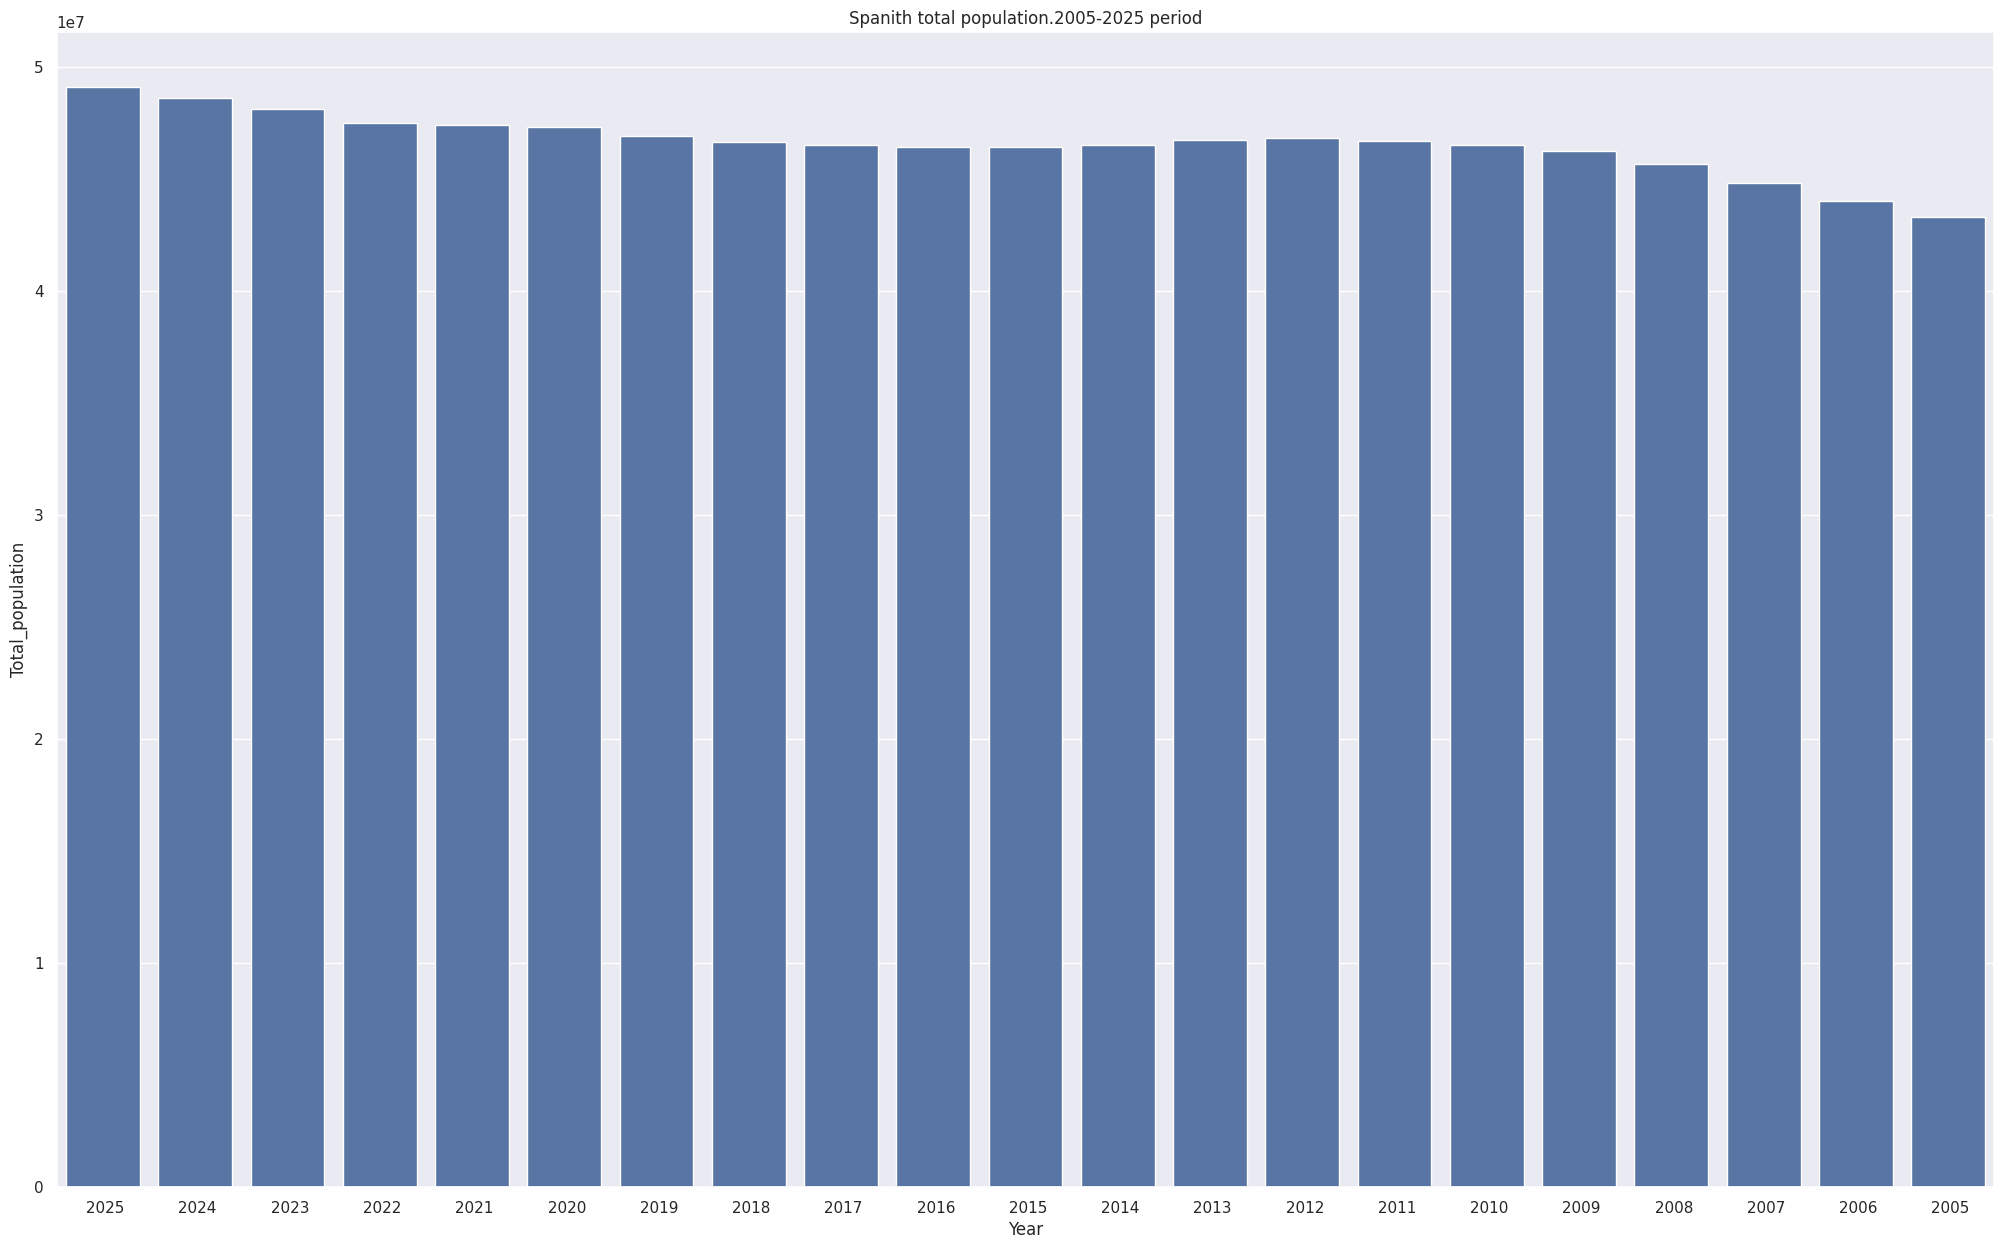

In [ ]:
# Create first barplot
sns.barplot(data = INE_first_plot,
            x = "Year", 
            y = "Total_population").set_title("Spanith total population.2005-2025 period")
plt.show()